# Определение факторов, влияющих на коммерческий успех игр

**Цель проекта**

Выявить закономерности, влияющие на успешность игр, чтобы помочь магазину «Стримчик» выбирать перспективные продукты и планировать рекламные кампании.


**Описание проекта**

Анализ исторических данных (до 2016 года) о продажах игр, оценках, жанрах и платформах для прогнозирования трендов на 2017 год. Результаты помогут определить факторы коммерческого успеха и оптимизировать ассортимент

**План проекта**

1. Обзор данных
2. Подготовка данных
3. Исследовательский анализ данных
4. Портрет пользователя по регионам
5. Проверка гипотез
6. Общий вывод

## Обзор данных

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исходный датафрейм содержит 11 колонок и 16715 строк.\
Есть пропуски в столбцах:
- Name
- Year_of_Release
- Genre
- Critic_Score 
- User_Score  
- Rating

Не корректный тип данных в столбцах:
- Year_of_Release - float64
- User_Score - object

Также названия колонок не соответствуют хорошему стилю - содержат заглавные буквы.

Вывод:

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Подготовка данных

### Заменим названия столбцов - приведем к нижнему регистру

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Замена прошла успешно.

### Обрабобаем пропуски при необходимости

Зафиксируем исходное количество данных в переменной, чтобы в дальнейшем оценить какой процент данных будет исключен после предобработки. Мы можем провести адекватный анализ, если после всех преобразований у нас осталось не менее 90% значений исходного датафрейма.

In [7]:
shape=len(df)
shape

16715

In [8]:
#проверим датафрейм на наличие строк-дубликатов
df.duplicated().sum()

0

Полных дубликатов не обнаружено.

Проверим на неявные дубликаты - одинаковые значения для пары "Имя - Игровая консоль".

In [9]:
duplicates = df[df.duplicated(subset=['name', 'platform'], keep=False)]

In [10]:
duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Обнаружены неявные дубликаты.\
Если бы в дублирующихся строках не содержались данные о продажах, то мы могли бы оставить в датафрейме только первое встречающееся значение. Например, обратим внимание на строку с игрой Need for Speed: Most Wanted, которая встречается второй. В этой строке мы видим что продажи в Америке составили 1 млн.копий. Мы не можем пренебречь такими значениями, поэтому удалять такие строки не будем. 

In [11]:
#выведем долю пропущенных значений для каждого столбца
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

В столбце name доля пропущенных значений составляет 0,1%. Название игры является важным параметром для дальнейшего анализа. Пропуски могут быть связаны с ошибками при сборе информации.\
Строки, где отстутсвует название, игры не представляют ценности для дальнейшего анализа.\
Мы не можем предположить логичной замены. Поэтому предлагается их удалить, особенно учитывая их малую долю в общем объеме данных. 

In [12]:
df = df.dropna(subset=['name'])

In [13]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.016095
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.400826
rating             0.404715
dtype: float64

В столбце year_of_release доля пропущенных значений составляет 1,6%.\
Пропуски могут быть связаны с ошибками при сборе информации, также эти данные могут отстуствовать для более старых игр.\
Посмотрим на записи с пропусками в соответствующих колонках с продажами.

In [14]:
#cоздаем dataframe, где year_of_release - пропуск
missing_year_sales = df[df['year_of_release'].isna()]

#выводим описание данных по продажам для строк с пропусками в year_of_release
missing_year_sales[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,269.000000,269.000000,269.000000,269.000000
mean,0.219888,0.090929,0.024907,0.032007
std,0.424907,0.207933,0.090160,0.075546
min,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.000000,0.000000,0.000000
50%,0.090000,0.020000,0.000000,0.010000
75%,0.240000,0.100000,0.000000,0.030000
max,4.260000,2.360000,0.770000,0.710000


Для записей с пропусками в столбцах с годом выхода игры медианные продажи по каждому региону находятся в диапазоне от 0 до 0.09 млн.копий.\
Мы можем пренебречь этими записями, учитывая, что для целей исследовани нам необходимы данные о годе выхода игры. 

Поэтому строки с пропущенными значениями не актуальны для дальнейшего анализа.\
В связи с тем, что мы не можем предположить логичной замены, а также учитывая их низкую долю в общем объеме данных, предлагается удалить строки с пропущенными значениями.

In [15]:
df = df.dropna(subset=['year_of_release'])

In [16]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.405984
dtype: float64

В столбцах critic_score, user_score, rating пропуски составляют 40-50%.\
В этих столбцах содержатся соответсвтенно -  оценки критиков, оценки пользователей и рейтинг от организации ESRB.\
Пропуски в данных столбцах могут быть связаны с тем, что критики, пользователи и организация ESRB оценивали не все игры. Также оценки могут отсутствовать для более старых игр.

Попробуем произвести логичную замену для столбца с оценками критиков, в котором 51,5% пропусков.
Сгруппируем игры по названию и заменим пропуски средним значением по каждой игре. Мы можем использовать среднее значение, а не медиану, так как оценки критиков приведены в обозначенном диапазоне - максимум 100. Поэтому предполагаем, что любую оценку, даже если она выбивается среди других, можно расценвать, не как аномалию, а как субъективное мнение.

In [17]:
#группируем DataFrame по 'name'
grouped = df.groupby('name')

#заполняем пропущенные значения средним для каждой группы
df['critic_score'] = grouped['critic_score'].transform(lambda x: x.fillna(x.mean()))

In [18]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Мы видим, что в столбце с оценками критиков остались пропущенные значения. Это произошло в связи с тем, что есть игры, для которых нет ни одной оценки критиков. Логичную замену таким пропускам мы не можем предложить, поэтому оставляем как есть.

В столбце с оценками критиков до преобразвания было 51,5% пропусков, после - 45,7%. В связи с большим процентом пропусков к выводам по данному параметру в дальнейшем ходе исследования нужно относиться с осторожностью.

In [19]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.457431
user_score         0.401666
rating             0.405984
dtype: float64

В столбце с оценками пользователей 40,2% пропусков. Выведем список уникальных значений.

In [20]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. 'tbd' (to be determined) переводится как - пока не определён. Так как оценки на момент исследования нет, то можем заменить'tbd' на NaN для дальнейшей работы с пропусками.

In [21]:
df['user_score'] = df['user_score'].replace('tbd', float("nan"))

In [22]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [23]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.457431
user_score         0.546157
rating             0.405984
dtype: float64

Замена прошла успешно.\
В результате преобразований количество пропусков в столбце с оценками пользователей увеличилось и теперь составляет 54,6%.\
Обратим внимание, что в столбце установлен тип данных object. Для дальнейшей работы и вычислений по столбцу нам необходимо изменить тип данных на float.

In [24]:
df['user_score'] = df['user_score'].astype(float) 

In [25]:
df['user_score'].dtype

dtype('float64')

Тип данных изменен успешно.\
Аналогично столбцу с оценками критиков заменим пропуски в столбце с оценками пользователей на средние по каждой игре.

In [26]:
#группируем DataFrame по 'name'
grouped = df.groupby('name')

#заполняем пропущенные значения средним для каждой группы
df['user_score'] = grouped['user_score'].transform(lambda x: x.fillna(x.mean()))

In [27]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [28]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.457431
user_score         0.481635
rating             0.405984
dtype: float64

В столбце с оценками пользователей остались пропущенные значения, но общая доля уменьшилась до 48,2%. К выводам по данному параметру надо относиться с осторожностью в связи с большим процентом пропусков.

Столбец rating содержит данные о рейтинге от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.\
В столбце 40,6% пропусков. Пропуски могут быть связаны с тем, что издатель компьютерной игры не стал получать оценку (система является добровольной).\
Мы не можем предложить логичную замену для пропусков в данном столбце. Однако в ходе анализа нам нужно будет ответить на вопрос - влияет ли рейтинг ESRB на продажи в отдельном регионе. Для этой цели предлагается заменить пропуски в данном столбце "заглушкой" - а именно на значение 0 (ноль). Под этим значением мы будем подразумевать отсутствие рейтинга.

In [29]:
df['rating'] = df['rating'].fillna(0)

In [30]:
df['rating']

0        E
1        0
2        E
3        E
4        0
        ..
16710    0
16711    0
16712    0
16713    0
16714    0
Name: rating, Length: 16444, dtype: object

Замена прошла успешно.

Проверим какой процент данных был удален из исходного датафрейма в результате обработки пропусков.

In [31]:
len(df)/shape

0.9837870176488184

После всех преобразований мы имеем 98,4% исходного датасета. Данных достаточно для продолжения исследования.

### Преобразуем данные в нужные типы

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     8922 non-null   float64
 9   user_score       8524 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


В столбце 'year_of_release' содержится информация о годе выпуска игры. В исходном датафрейме тип данных - float64.
В данном случае, наиболее подходящий тип данных для столбца - int.
Вот почему:
* int (целое число): Год - это целое число, поэтому тип `int` идеально подходит для хранения этой информации. Он более компактен и эффективен по сравнению с `datetime`.
* datetime (дата и время): Тип `datetime` предназначен для хранения даты и времени. Хотя он может хранить год, он также включает в себя информацию о месяце, дне, часе, минутах и секундах, которая нам в данном случае не нужна. 

In [33]:
#изменим тип данных
df['year_of_release'] = df['year_of_release'].astype(int) 

In [34]:
df['year_of_release'].dtype

dtype('int64')

Преобразование прошло успешно.

### Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [35]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,0


In [36]:
# Вычисление суммарных продаж
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [37]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,0,31.38


Столбец с суммарными продажами добавлен успешно.

На этом этапе мы провели следующие действия:

1. Привели названия столбцов к нижнему регистру.
2. Обработали пропуски: 
    * Название игры: удалили строки с пропусками, так как они не несли ценности для анализа.
    * Год выпуска: удалили строки с пропусками, так как без этой информации анализ был бы невозможен.
    * Оценка критиков: заменили пропуски средним значением по каждой игре. Это позволило частично заполнить пропуски, но важно помнить, что 45,7% данных все еще отсутствует. 
    * Оценка пользователей: заменили 'tbd' на NaN, затем также заменили пропуски средним значением по каждой игре. В результате доля пропусков снизилась, но остается большой (48,2%).
    * Рейтинг ESRB: не производили замену, так как пропуски могут быть связаны с особенностями игры.
3. Преобразовали типы данных в столбцах 'year_of_release' (изменили на int) и в столбце 'user_score' (изменили на float)
4. Посчитали суммарные продажи во всех регионах и запиcали их в отдельный столбец.

Важно отметить:

* Доля пропусков в столбцах с оценками критиков и пользователей остается значительной, что может повлиять на результаты анализа. Необходимо с осторожностью интерпретировать данные, полученные на основе этих столбцов.

В целом, подготовка данных позволила нам получить более качественный набор данных для дальнейшего анализа, но важно помнить о ограничениях, связанных с наличием пропусков.

## Исследовательский анализ данных

### Анализ игр по годам

Построим столбчатую диаграмму для визуализации количества игр, выпущенных в разные годы.

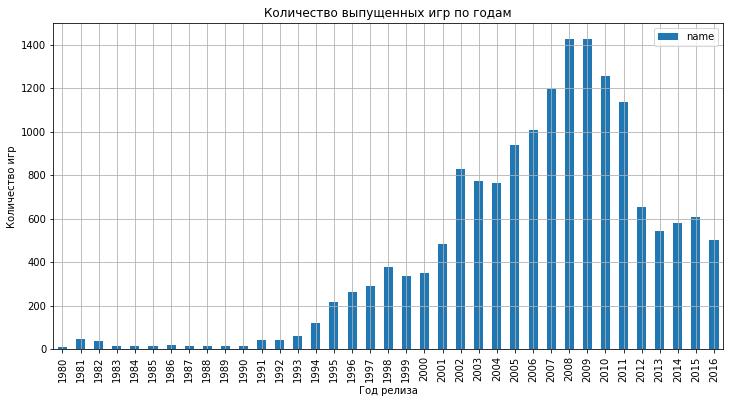

In [38]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot.bar(grid=True, figsize=(12, 6))

plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.show()

График показывает рост количества выпущенных игр с 1980 года по 2008 год. Это говорит о взрывном развитии игровой индустрии. После 2008 года наблюдается уменьшение количества релизов, но в целом уровень остается высоким.

Рассмотрим график с точки зрения того, что происходило на рынке в соответствующие года:

* 1980-1985: начало эры домашних игровых консолей. Появление Atari, Nintendo и других компаний. 
* 1985-1995: появление и развитие 16-битных консолей (Super Nintendo, Sega Genesis). Появление жанров RPG и платформеров.  
* 1995-2005: золотой век игровой индустрии. Рост популярности PlayStation и Nintendo 64. Расширение жанров, появление онлайн-игр.
* 2005-2010: появление Xbox 360 и PlayStation 3. Развитие HD-графики, онлайн-игр и киберспорта.
* 2010-2016: появление мобильных игр, смартфонов и планшетов. 

Снижение после 2008 года:

* Финансовый кризис 2008 года: кризис повлиял на все отрасли, в том числе на игровую индустрию.
* Насыщение рынка: в 2000-х годах было выпущено огромное количество игр, что привело к усилению конкуренции.
* Изменения в поведении потребителей: рост популярности мобильных игр и бесплатных онлайн-игр.

Таким образом, на количество выпущенных игр в 1980-2016 гг. повлияли экономические условия, а также появление новых платформ и технологий.

Построим диаграмму размаха, чтобы оценить выбивающиеся значения.

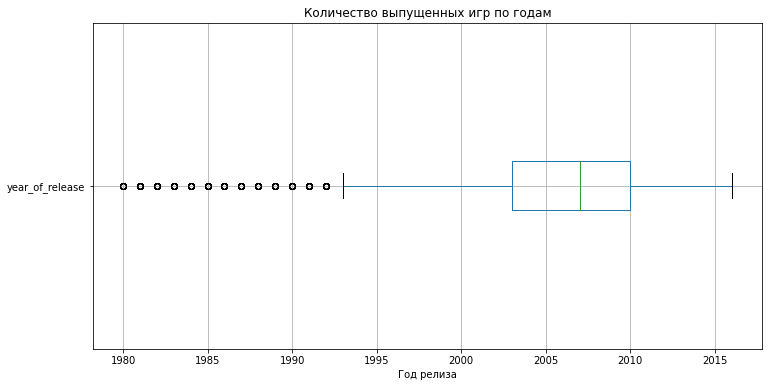

In [39]:
plt.figure(figsize=(12, 6)) 
df.boxplot('year_of_release', vert=False)

plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год релиза')

plt.show()

Нижний «ус» упирается в минимальное значение, верхний - в максимальное. Это ориентировочная граница нормального размаха. Более низкие значения рисуются отдельными точками: таких выбросов очень мало. Значения, которые отсёк нижний «ус», — редкие. Видно, насколько медиана (зеленая линия) не стремится к длинному хвосту низких значений.
Проанализируем статистику и определим, какие годы будут наиболее важны для дальнейшего анализа.

In [40]:
df['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

* `mean` (среднее): средний год выпуска игр в датасете - 2006.
* `std` (стандартное отклонение): стандартное отклонение показывает, насколько разбросаны данные вокруг среднего. 5.8 лет - это довольно большой разброс.
* `min` (минимум): самая ранняя игра в датасете была выпущена в 1980 году.
* `max` (максимум): самая поздняя игра была выпущена в 2016 году.
* `25%` (первый квартиль): 25% игр были выпущены до 2003 года.
* `50%` (медиана): 50% игр были выпущены до 2007 года.
* `75%` (третий квартиль): 75% игр были выпущены до 2010 года.

Исходя из этих данных, с точки зрения статистической значимости следует обратить внимание на следующие годы:

1. 1980-е годы: самые ранние игры, возможно, будут иметь свои особенности, которые могут отличаться от более поздних игр. Эти данные могут быть менее важными для анализа.
2. 2003-2010 годы: период, когда были выпущены 50% игр (между первым и третьим квартилем). В этом диапазоне наиболее вероятно наблюдать общие тенденции в развитии игр. Это важные данные для анализа.
3. 2010 год: переходный момент, так как после него было выпущено меньше 25% игр. Однако не смотря на меньшее значение, данные после 2010 г. будут важны для анализа, так как они являются наиболее актуальными по сроку выхода.

Таким образом, дальнейший анализ предлагается проводить по годам - с 2003 по 2016гг.

In [41]:
#фильтруем данные по годам 2003-2016
filtred_df = df.query('2003 <= year_of_release')

In [42]:
filtred_df['year_of_release'].unique()

array([2006, 2008, 2009, 2005, 2007, 2010, 2013, 2004, 2011, 2015, 2012,
       2014, 2016, 2003])

Фильтрация прошла успешно.

### Анализ продаж по платформам

Выберем 10 платформ с наибольшими суммарными продажами.

In [43]:
platform_pivot = filtred_df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum'
).sort_values(by='total_sales', ascending=False)

#рассчитаем накопленный удельный вес
platform_pivot['cumulative_percentage'] = (platform_pivot['total_sales'].cumsum() / platform_pivot['total_sales'].sum()) * 100

In [44]:
platform_pivot.head(10)

,total_sales,cumulative_percentage
platform,,
X360,961.24,15.426589
PS3,931.34,30.373323
Wii,891.18,44.675545
PS2,822.58,57.876830
DS,802.76,70.760031
PS4,314.14,75.801549
PSP,289.53,80.448110
3DS,257.81,84.585608
PC,187.02,87.587024


Для дальнейшего анализа предлагается выбрать платформы  X360, PS3, Wii, PS2, DS - так как их суммарный удельный вес в общем объеме данных составляет более 70%.

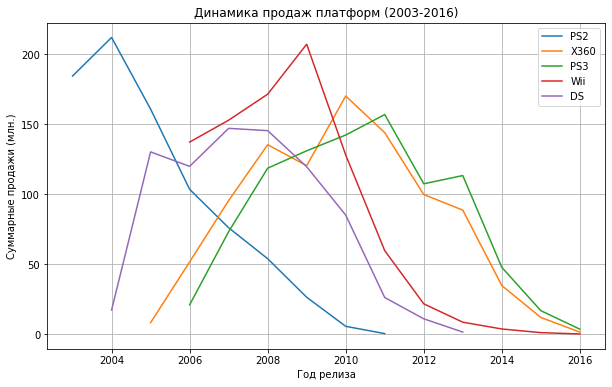

In [45]:
#выбираем платформы для отображения
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

#создаем словарь для хранения данных о продажах по каждой платформе
sales_by_platform = {}
for platform in platforms:
    sales_by_platform[platform] = filtred_df[
        (filtred_df['platform'] == platform)
    ].groupby('year_of_release')['total_sales'].sum()

#строим график
plt.figure(figsize=(10, 6))
for platform, sales in sales_by_platform.items():
    plt.plot(sales.index, sales.values, label=platform)

plt.xlabel('Год релиза')
plt.ylabel('Суммарные продажи (млн.)')
plt.title('Динамика продаж платформ (2003-2016)')
plt.legend()
plt.grid(True)
plt.show()

* Появление новых платформ: новые платформы, как правило, достигают пика продаж довольно быстро (в течение 3-5 лет после выхода). 
* Исчезновение старых платформ: старые платформы постепенно теряют популярность, их продажи снижаются в течение 5-7 лет, после чего они практически перестают выпускаться.

Пример:

- PS2: Вышла в 2000 году, пик продаж был в 2004г.  
- PS3: Вышла в 2006 году, пик продаж был в 2011г.
- Wii: Вышла в 2006 году, пик продаж был в 2009г. 

Выводы:

* Цикл жизни платформы: исходя из данных, можно предположить, что характерный срок жизни платформы составляет примерно 5-7 лет. 
* Влияние конкуренции: срок жизни платформы также может зависеть от конкуренции на рынке.

### Анализ потенциально прибыльных платформ.

На предыдущем шаге мы рассмотрели 5 платформ с самыми высокими продажами - PS2, X360, PS3, Wii, DS. На графике видно, что по всем этим платформам продажи падают. Можно отметить, что все эти платформы вышли с 2000 по 2006 год включительно. Учитывая выявленную на предыдущем шаге тенденцию - срок жизни платформы 5-7 лет, спад по этим платформам является закономерным.\
Чтобы выбрать несколько потенциально прибыльных платформ, нам нужно сузить временной интервал. Сейчас мы рассматриваем игры, вышедшие с 2003 по 2016 год. В связи с тем, что жизненный цикл платформы составляет 5-7 лет, то игры, вышедшие в 2003 году, к 2010 г. уже теряют свою актуальность.\
Чтобы определить актуальный период, мы должны руководствоваться основным фактором — эти данные будут нужны для построения прогноза на 2017 год. В связи с тем, что жизненный цикл платформы составляет 5-7 лет, то то игры, вышедшие в 2003 году, к 2010 г. уже теряют свою актуальность.\
Для целей дальнейшего анализа предлагается использовать данные с 2012 по 2017 год - так как за этот период мы можем получить информацию о действующих платформах.

In [46]:
filtred_df = df.query('2012 <= year_of_release')

In [47]:
filtred_df['year_of_release'].unique()

array([2013, 2015, 2012, 2014, 2016])

Фильтрация прошла успешно.

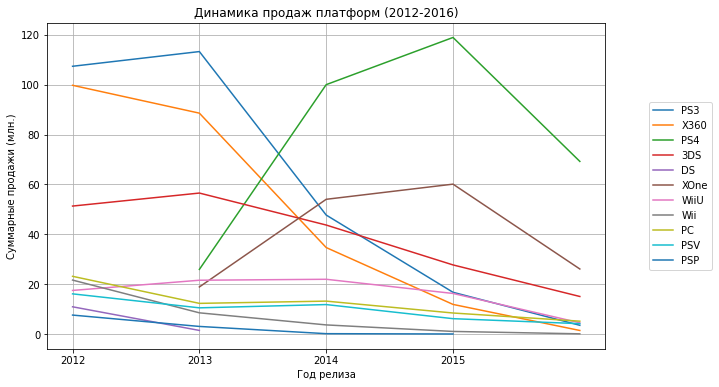

In [48]:
#создаем словарь для хранения данных о продажах по каждой платформе
sales_by_platform = {}
for platform in filtred_df['platform']:
    sales_by_platform[platform] = filtred_df[
        (filtred_df['platform'] == platform)
    ].groupby('year_of_release')['total_sales'].sum()

#строим график
plt.figure(figsize=(10, 6))
for platform, sales in sales_by_platform.items():
    plt.plot(sales.index, sales.values, label=platform)

plt.xlabel('Год релиза')
plt.ylabel('Суммарные продажи (млн.)')
plt.title('Динамика продаж платформ (2012-2016)')
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5)) #перемещаем легенду в правый угол
plt.xticks(sales.index.astype(int)) #установка целых значений на оси OX
plt.grid(True)
plt.show()

Мы видим, что по всем платформам продажи убывают. Это может быть связано с тем, что только платформы PS4 и XOne вышли в 2013 г, остальные - раньше и большинство практически исчерпало себя.

Среди всех платформ выделяется PS4, пик продаж приходится на 2015г. (около 120 млн.), после чего мы видим падение продаж. Судя по графику жизненый цикл PS4 еще продолжаются и даже с учетом падения продажи по этой платформе значительно больше, чем по другим платформам (около 70 млн в 2016 г.). Поэтому можно назвать данную платформу потенциально прибыльной.

Судя по графику второе место по продажам занимает платформа XOne, пик продаж которой также приходится на 2015 г. и составляет 60 млн. В 2016 году продажи по данной платформе составляют около 30 млн., что позволяет назвать эту платформу перспективной.

Обратим внимание на схожесть графиков PS4 и XOne - обе жти платформы вышли в 2013 г., обе имеют 2 пика - в 2014 и 2015 году, и продажи по обеим начинают падать после 2015 г. Таким образом можно назвать эти две платформы конкурирующими за рынок в исследуемом периоде. Однако суммарные продажи показыают, что продажи платформы PS4 примерно в 2 раза выше, чем у XOne.

Также на графике выделяются продажи 3DS, которые падают с 2012 г., но в 2016 году продажи все ещё приносят выручку и сохраняются на уровне 18 млн. Таким образом платформа может ещё быть потенциально прибыльной.

### Анализ глобальных продаж игр в разбивке по платформам

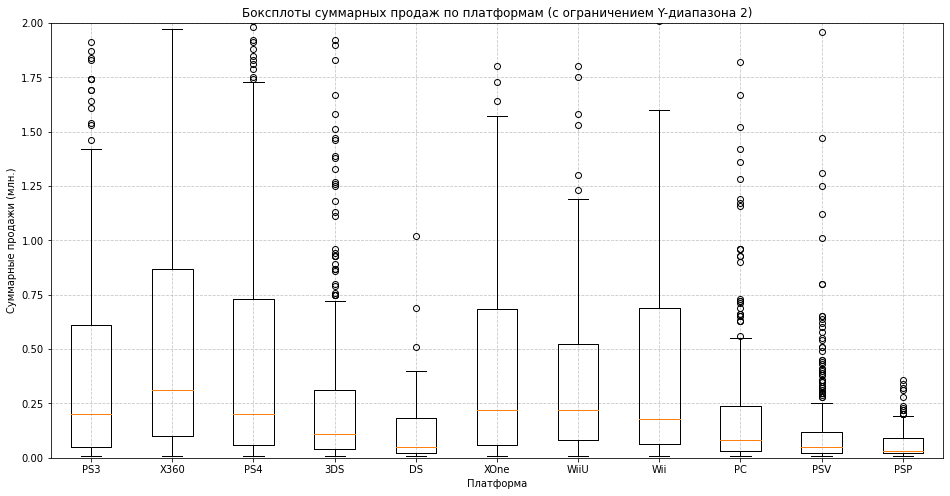

In [50]:
plt.figure(figsize=(16, 8)) #увеличиваем размер 
data = [filtred_df[filtred_df["platform"] == platform]["total_sales"] for platform in filtred_df["platform"].unique()]

plt.boxplot(
    data,
    labels=filtred_df["platform"].unique(),
        whis=1.5 #устанавливаем межквартильный размах
)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн.)')
plt.title('Боксплоты суммарных продаж по платформам (с ограничением Y-диапазона 2)')
plt.ylim(0, 2) #устанавливаем ограничение оси Y
plt.grid(True, axis='both', linestyle='--', alpha=0.7) #добавляем сетку
plt.show()

График "ящик с усами" демонстрирует распределение глобальных продаж игр по различным платформам за период с 2012 по 2016 год. На графике видно, что:
Третий квартиль выше всего находится у платформ X360, PS4, XOne, Wii - это значит что для этих платформ 75% всех продаж находятся в более высоком диапазоне, чем у остальных.
Чуть ниже третий квартиль у PS3, причем у этой платформы самый большой разброс данных - единичные значения продаж выше 20 млн. Также значительный диапазон продаж характерен для платформ X360, PS4, 3DS, что может свидетельствовать о наличии хитовых игр в общем объеме продаж.

### Анализ влияния отзывов пользователей и критиковна на продажи внутри платформы 

Построим диаграмму рассеяния для определения взаимосвязи между оценками пользователей и продажами для платформы PS4.

In [51]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,0,31.38


На этапе предобработки данных в столбцах с оценками пользователей и критиков был обнаружен большой процент пропусков. Оценим процент пропусков для игр на платформе PS4.

In [52]:
ps4 = filtred_df.query('platform == "PS4"')

In [53]:
ps4.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.275510
user_score         0.262755
rating             0.000000
total_sales        0.000000
dtype: float64

27,5% пропусков в столбце с оценками критиков и 26,3% пропусков в столбце с оценками пользователей.\
К выводам по данным параметрам надо относиться с осторожностью.

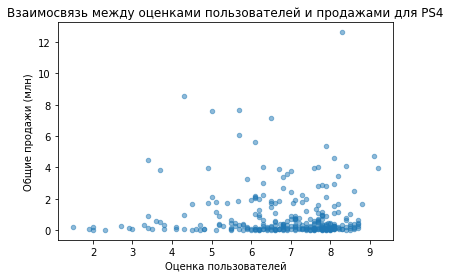

In [54]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)

plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи (млн)')
plt.title('Взаимосвязь между оценками пользователей и продажами для PS4')

plt.show()

Глядя на график мы не можем сделать вывод о наличии зависимости между оценками пользователей и продажами игр для платформы PS4. Большинство оценок сконцентрированно в интервале от 6 до 9 баллов. В то время как разброс значений по продажам лежит в диапазоне от 0 до 2 млн.р. При этом есть отдельные значения высоких продаж при низких оценках: 3-4 балла при продажах в 4-5 млн., 4,5 балла при продажах в 9 миллионов. Также можем выделить отдельное значение с максимальльной продажей в 12 млн и оценкой 8.5 баллов.
Для оценки силы взаимосвязи рассчитаем коэффициент корреляции Пирсона.

In [55]:
ps4['user_score'].corr(df['total_sales'])

-0.022937975931579375

Полученная корреляция -0.023 между оценками пользователей и продажами игр для платформы PS4 указывает на очень слабую или практически отсутствующую связь. Это означает, что оценка пользователей не является значимым фактором для продаж игр на PS4.
Однако напомним, что в столбце с оценками пользоваелей 26,3% пропусков. Возможно при наличии полного объема данных по этому параметру мы бы могли наблюдать другу картину.

Построим диаграмму рассеяния для определения взаимосвязи между оценками критиков и продажами для платформы PS4.

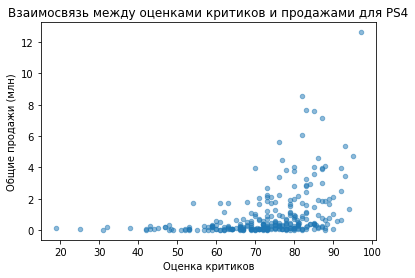

In [56]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)

plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи (млн)')
plt.title('Взаимосвязь между оценками критиков и продажами для PS4')

plt.show()

Мы видим, что на графике с оценками критиков и продажами значения менее разбросаны, чем на графике с оценками пользователей и можем предположить некоторую взаимосвязь - так как чем выше оценка критиков, тем больше высоких значений продаж на графике.

Оценки критиков сконцентрирвоанны в диапазоне между 40 и 90 баллами. До 40 наблюдаем единичные значения. При этом основной объем продаж на всем диапазоне лежит в интервале от 0 до 2 млн, с увеличением оценки наблюдаем расширение интервала до 4 млн.\
На высоких оценках 80-100 баллов есть единичные значения продажы до 8 млн. Выделяется продажа более 12 миллионнов с оценкой около 100 баллов (такую же мы видели на предыдущем графике). Можно сделать вывод, что это игра, которая стала хитом.\
Для оценки силы взаимосвязи рассчитаем коэффициент корреляции Пирсона.

In [57]:
ps4['critic_score'].corr(df['total_sales'])

0.39126521038185746

Корреляция между оценками критиков и общим объемом продаж для игр на PS4 равна 0.39. Это свидетельствует о наличии средне-слабой положительной линейной связи между этими двумя переменными. Значение 0.39 означает, что, как правило, игры с более высокими оценками критиков имеют тенденцию продаваться лучше, однако эта связь не является очень сильной.

Сравнивая два коэффициента корреляции – продажи и оценки критиков с продажами и оценками пользователей, можно сделать вывод, что между продажами и оценками критиков наблюдается прямая, средне-слабая корреляция, в то время как между продажами и оценками пользователей линейная связь отсутствует.

Вывод:

Данные показывают, что оценки критиков демонстрируют слабую прямую корреляцию с продажами игр на PS4. Это не означает, что оценки критиков непосредственно влияют на продажи. 

Важно отметить, что корреляция не означает причинно-следственную связь. Нельзя утверждать, что высокие оценки критиков напрямую приводят к большим продажам. 

**Соотнесем выводы с продажами игр на других платформах**

По итогам проведенного анализа влияния оценок пользователей и критиков на продажи игр на платформе PS4 было установлено:
- оценки пользователей практически не влияют на продажи,
- оценки критиков в некоторой степени влияют на продажи, но это влияение не является решающим.

Это может быть связано с тем, что оценка - это субъективный фактор. И если критики - это эксперты, и их мнению можно доверять, то оценки пользователей - сугубо субъективны, поэтому при покупке игры не все опираются на этот параметр.

Кроме того, на продажи игр, вероятно, влияют и другие факторы, такие как жанр, маркетинговые кампании, цена, доступность, популярность франшизы и т.д.
Поэтому мы можем предположить, что выявленная тенденция будет характерна также и для игр на других платформах.

Отдельно отметим, что в данныхс оценками пользователей и критиков мы имеем большое количество пропусков, возможно при полном объеме данных мы сможем выявить другие закономерности.

### Анализ общего распределения игр по жанрам.

In [58]:
#применим метод reset_index() для преобразования индекса в столбец
genre_pivot= filtred_df.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'median']).reset_index()

#переименуем столбцы
genre_pivot.columns = ['genre', 'count', 'median']
genre_pivot.sort_values(by='median', ascending=False)

,genre,count,median
8,Shooter,235,0.440
10,Sports,268,0.240
4,Platform,85,0.210
7,Role-Playing,370,0.140
6,Racing,115,0.140
2,Fighting,109,0.130
0,Action,1031,0.120
3,Misc,192,0.120
9,Simulation,80,0.120
11,Strategy,71,0.080


Анализ данных по жанрам игр показывает, что Shooter и Sports - самые популярные жанры, с наибольшим медианным значением продаж (0.44 млн и 0.24 млн соответственно). Это говорит о том, что в этих жанрах чаще встречаются коммерчески успешные игры. 

Жанры Role-Playing и Racing имеют среднее количество игр, но их медианные продажи также относительно высоки (0.14 млн), что свидетельствует об их стабильной популярности.

В то же время Action - самый многочисленный жанр, с количеством игр, которое в 1,5-2 раза больше, чем в других жанрах. Однако медиана продаж в Action ниже, чем в Shooter и Sports. Это связано с тем, что в жанре Action присутствует большое количество непопулярных игр с низкими объёмами продаж. Доля Shooter составляет всего 8% от всех игр, что говорит о большей концентрации успешных игр в этом жанре. 

Остальные жанры менее популярны, с меньшим количеством игр и более низкими медианными продажами. 

В целом, данные показывают, что Shooter и Sports - наиболее коммерчески успешные жанры, Action, несмотря на большое количество игр, отличается более низкими медианными продажами. Это связано с наличием большого числа непопулярных игр в этом жанре.

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

Определим самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP).

In [59]:
#строим сводную таблицу
sales_by_platform = (
    filtred_df.pivot_table(
    index='platform', 
    values=('na_sales', 'eu_sales', 'jp_sales'),
    aggfunc='sum')
)

In [60]:
sales_by_platform

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
DS,3.53,3.72,4.59
PC,37.76,0.00,19.12
PS3,106.86,35.29,103.38
PS4,141.09,15.96,108.74
PSP,0.42,10.47,0.13
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10


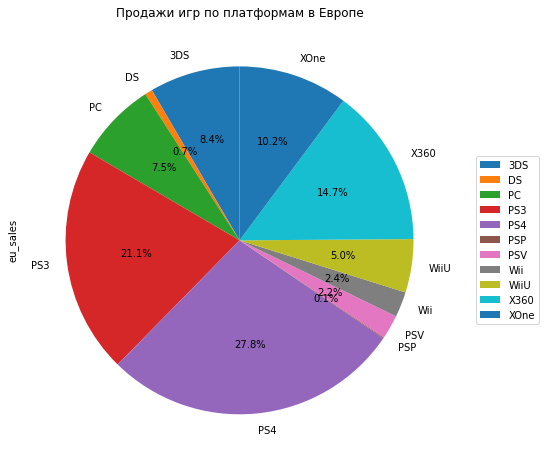

In [61]:
#строим круговую диаграмму
sales_by_platform.plot(kind='pie', y='eu_sales', figsize=(8,8), autopct='%1.1f%%', startangle=90)

plt.title('Продажи игр по платформам в Европе')
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5)) #перемещаем легенду в правый угол
plt.show()

Первое место по продажам игр в Европе занимает платформа PS4 - 27,8% рынка.\
Далее следует PS3 - 21,1%\
Третье место у платформы Х360 - 14,7%\
Четвертое - XOne - 10,2%\
Пятое - 3DS - 8,4%

Таким образом, самой популярной платформой в Европе является PS4, а вместе с предыдущей версией - PS3, они занимают почти 50% рынка в 2012-2016 гг.\
Около 25% рынка у платформ семейства XBox - X360 и Xone.\
Замыкает рейтинг топ-5 самых популярных платформ для игр в Европе - 3DS с 8,5% рынка.

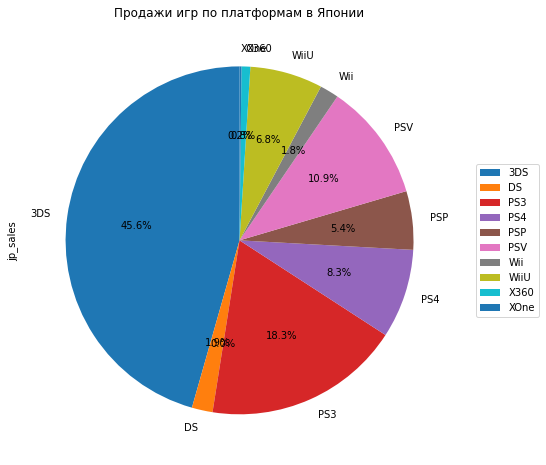

In [62]:
#строим круговую диаграмму
sales_by_platform.plot(kind='pie', y='jp_sales', figsize=(8,8), autopct='%1.1f%%', startangle=90)

plt.title('Продажи игр по платформам в Японии')
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5)) #перемещаем легенду в правый угол
plt.show()

В Японии в 2012-2016гг 45,6% рынка занимают игры на платформе 3DS.\
Второе место - игры на PS3 - 18,3% рынка.\
Третье место - игры на PSV - 10,9% рынка.\
Четвертое место - игры на PS4 - 8,3% рынка.\
Пятое - игры на WiiU - 6,8% рынка.

Можем сделать вывод, что в Японии самой популярной платформой для игр является 3DS, которая занимает практически половину всего рынка.В Европе эта платформа занимает только 5-ю позицию рейтинга.\
Популярные в Европе платформы 3DS, X360 и XOne не вошли в рейтинг топ-5 самых популярных платформ в Японии.\
Нужно отметить платформу WiiU, которая не пользуется большой популярностью в Европе, но в Японии занимает 5-ю позицию рейтинга.
По сравнению с Европой, где самыми популярными платформами являются различные версии PS, в Японии они пользуются гораздо меньшим спросом.

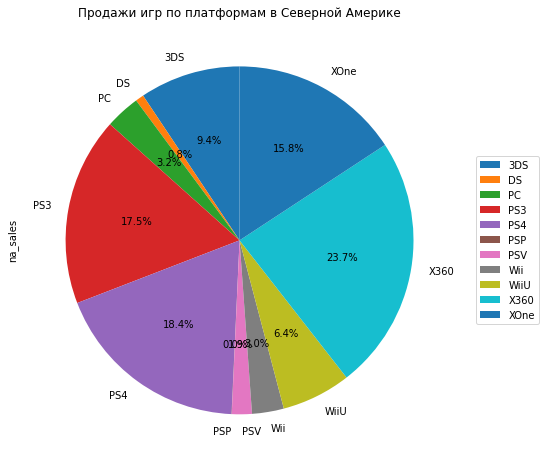

In [63]:
#строим круговую диаграмму
sales_by_platform.plot(kind='pie', y='na_sales', figsize=(8,8), autopct='%1.1f%%', startangle=90)

plt.title('Продажи игр по платформам в Северной Америке')
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5)) #перемещаем легенду в правый угол
plt.show()

Самой популярной платформой в 2012-2016 гг. является X360 - 23,7% рынка.\
Второй по популярности является PS4 - 18,4%.\
Третье место занимает PS3 - 17,5%.\
Четвертое - XOne - 15,8%.\
Пятое - 3DS - 9,4%.

Таким образом рынок игр в Северной Америке делят между собой платформы XBox (около 40% рынка приходится на X360 и XOne) и PS (около 36% рынка приходится на PS3 и PS4).\
Рейтинг топ-5 самых популярных платформ для игр в Северной Америке замыкает платформа 3DS с 9,4% рынка.\

Распределение рынка в Северной Америке имеет схожесть с европейским рынком, с небольшим отличием в сторону популярности XBox перед PS, тогда как в Европе более популярны PS. Платформа 3DS и в американском, и в европейком рейтинге занимает пятое место.

### Самые популярные жанры (топ-5)  для пользователя каждого региона (NA, EU, JP)

In [64]:
#строим сводную таблицу
sales_by_genre = (
    filtred_df.pivot_table(
    index='genre', 
    values=('na_sales', 'eu_sales', 'jp_sales'),
    aggfunc='sum')
)

In [65]:
sales_by_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Adventure,9.46,8.24,8.92
Fighting,10.79,9.44,19.79
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Puzzle,1.40,2.14,1.13
Racing,27.29,2.50,17.22
Role-Playing,48.53,65.44,64.00
Shooter,113.47,9.23,144.77


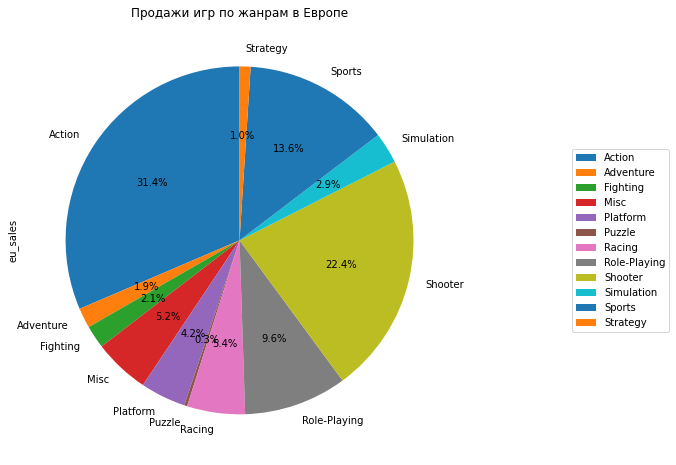

In [66]:
#строим круговую диаграмму
sales_by_genre.plot(kind='pie', y='eu_sales', figsize=(8,8), autopct='%1.1f%%', startangle=90)

plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5)) #перемещаем легенду в правый угол
plt.title('Продажи игр по жанрам в Европе')
plt.show()

В Европе наибольшей популярностью пользуются игры в жанре action - 31,4%.\
Второе место занимает жанр shooter - 22,4%.\
Третье место - sports - 13,6%.\
Четвертое место - role-playing - 9,6%.\
Пятое место - racing - 5,4%.

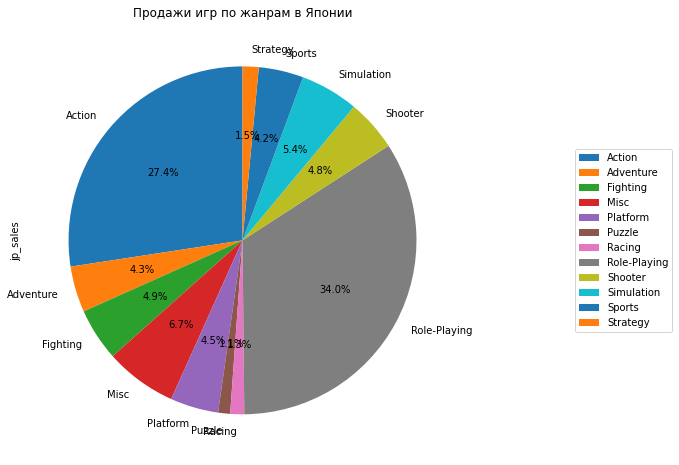

In [67]:
#строим круговую диаграмму
sales_by_genre.plot(kind='pie', y='jp_sales', figsize=(8,8), autopct='%1.1f%%', startangle=90)

plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5)) #перемещаем легенду в правый угол
plt.title('Продажи игр по жанрам в Японии')
plt.show()

В Японии наибольшей популярностью пользуются игры жанра role-playing - 34,0%.\
Второе место - игры action - 27,4%.\
Третье место - игры misc (разное) - 6,7%.\
Четвертое - simulation - 5,4%
Пятое - fighting - 4,9%.

В отличии от Европы, где игры по ролям лишь на четвертом месте, в Японии это самый популярный жанр, который занимает более трети рынка.\
Игры жанра action в Японии также пользуются высокой популярностью, как и в Европе и занимают практически одинаковую долю рынка - 22,4% в Европе и 27,4% в Японии.\
В Японии на третьем месте оказались игры из жанров "разное", в эту группу вошли игры, которые не относятся к основным выделяемым жанрам. В Европе игры этих жанров не вошли в рейтинг топ-5.
Популярные в Европе игры жанров sports и racing не вошли в японский рейтинг. Зато наблюдаем жанры simulation и fighting.

Таким образом, распределение продаж игр по жанрам в Японии отличается от Европы, общими ля этих двух регионов является популярность игр action.

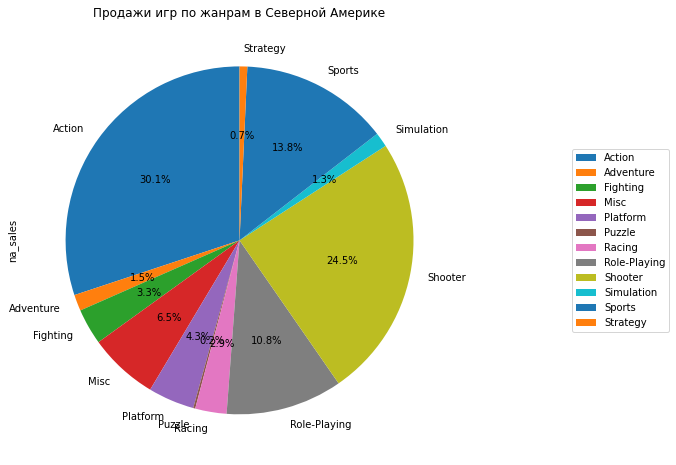

In [68]:
#строим круговую диаграмму
sales_by_genre.plot(kind='pie', y='na_sales', figsize=(8,8), autopct='%1.1f%%', startangle=90)

plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5)) #перемещаем легенду в правый угол
plt.title('Продажи игр по жанрам в Северной Америке')
plt.show()

В Свереной Америке самый популярный игровой жанр - action - 30,1% рынка.\
Второе место - shooter - 24,5% рынка.\
Третье место - sports - 13,8% рынка.\
Четвертое - role-playing - 10,8%.\
Пятое - misc - 6,5%.

В Северной Америке, также как и в Европе, и в Японии игры жанра action пользуются высокой популярностью. Доля рынка у этих игр в Северной Америке практически такая же как в Европе, но больше, чем в Японии -  30,1% в Северной Америке против 31,4% в Европе и 27,4% в Японии.\

На втором месте в Северной Америке, также как и в Европе, игры жанра shooter - 24,5% рынка, в Европе они занимают 22,4%.

Игры жанра sports в Америке на третьем месте с долей рынка 13,8%, что также соответствует рейтингу в Европе - тоже третье место и 13,6%. 

Четвертое место в Северной Америке также совпадает с данными по Европе - это ролевые игры с 10,8% рынка в Америке и 9,6% в Европе.

Пятое место в Северной Америке занимают игры жанра "разное" (6,5%) - не вошедшие в выделенные классы. В европейском рейтинге этот жанр не представлен, а в японском занимает третье место (6,7%).

Таким образом, рейтинг продаж игр по жанрам в Северной Америке практически полностью совпадает с рейтингом в Европе. Отличие рейтингов в пятой позиции - В Америке это игры жанра "разное", которые не вошли в Европейский рейтинг, но представлены в японском, практически с такой же долей рынка, как и в Америке.

### Анализ влияния рейтинга ESRB на продажи в отдельном регионе

In [69]:
#строим сводную таблицу
sales_by_rating = (
    filtred_df.pivot_table(
    index='rating', 
    values=('na_sales', 'eu_sales', 'jp_sales'),
    aggfunc='sum',
    dropna=False
    )
)

In [70]:
sales_by_rating 

,eu_sales,jp_sales,na_sales
rating,,,
0,91.50,108.84,103.31
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02


ESRB означает Совет по рейтингу развлекательного программного обеспечения. Это организация, которая присваивает рейтинги видеоиграм в Северной и Центральной Америке.\
Значения рейтинга:

- E - все
- Е 10+ – все в возрасте 10+
- T - подростки
- M – взрослые (17+)

Обращаем внимание, то на этапе предобработки данных мы выявили 40,6% пропусков. Пропущеные значения мы заменили на О (ноль).

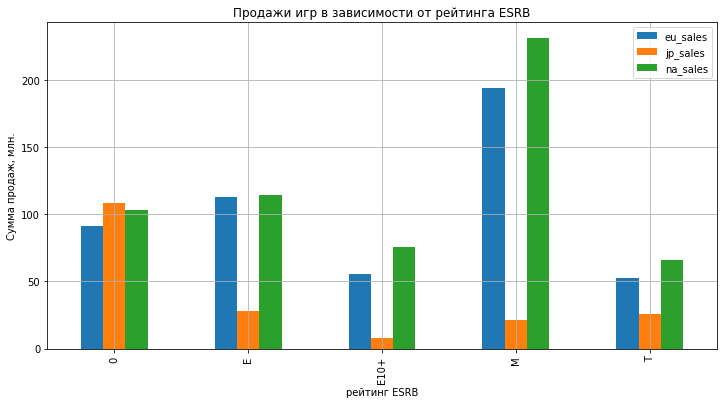

In [71]:
#строим групповую столбчатую диаграмму
sales_by_rating.plot.bar(grid=True, figsize=(12, 6))

plt.title('Продажи игр в зависимости от рейтинга ESRB')
plt.xlabel('рейтинг ESRB')
plt.ylabel('Сумма продаж, млн.')

plt.show()

Анализ продаж по рейтингу ESRB с учетом замены пропусков на "0" показывает:

* В Северной Америке: игры с рейтингом "M" (для взрослых) демонстрируют наибольшие продажи, за ними следуют игры с рейтингом "E" (для всех) и "0" (без рейтинга). 
* в Европе также заметно влияние рейтинга ESRB, но с несколько иной тенденцией. Рейтинг "M" также является наиболее прибыльным, за ним следует "E" и "0".
* в Японии влияние рейтинга ESRB менее выражено. Самые высокие продажи у игр без рейтинга, затем у игр с рейтингом "E" и "M". 

Выводы:

* Игры с рейтингом "E10+" (для всех старше 10 лет) показывают значительно более низкие продажи во всех регионах по сравнению с другими рейтингами.
* Игры с рейтингом "T" (для подростков) также показывают довольно низкие продажи, но их доля продаж выше в Северной Америке и Европе, чем в Японии.
* В целом рейтинг ESRB в Японии имеет меньшее влияние на продажи, чем в Европе и Северной Америке.
* Такое распределение может быть связано с тем, что ESRB - американская система, и её влияние на рынки в Европе и Америке значительно выше, чем в Азии, где действуют свои лоальные системы.


В целом, замена пропусков на "0" позволила нам получить более полную картину влияния рейтинга ESRB на продажи. Однако необходимо учитывать, что замена пропусков на "0" может искажать результаты, особенно в отношении игр с неизвестным рейтингом. 

## Проверка гипотез

### Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для количественной проверки исследовательскую задачу нужно
перевести на язык статистики —  сформулировать в виде
набора статистических гипотез.

Нулевая гипотеза чаще всего формулируется в виде:\
"параметр ГС равен некоторому числу",
так как это позволяет — принимая верной — построить одно выборочное
распределение для статистики, которой оценивается этот параметр. С одним
распределением работать проще, чем со множеством распределений.
Для формулировки альтернативной гипотезы используется альтернативный вариант, например:\
"параметр ГС не равен числу из нулевой гипотезы" — двусторонняя альтернативная гипотеза.

Сформулируем гипотезы для поставленной задачи:
* Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
Мы предполагаем, что нет значимого различия в среднем пользовательском рейтинге между двумя платформами.
* Альтернативная гипотеза (H1): Средние пользовательские рейтинги Xbox One и PC отличаются.\
Мы хотим проверить, есть ли доказательства того, что средние рейтинги действительно отличаются. 

Выбор критерия:\
Мы будем использовать двухвыборочный t-тест для проверки гипотез о равенстве средних двух независимых выборок.
Этот критерий подходит, так как данные о рейтингах являются непрерывными, а выборки (Xbox One и PC) независимы.

Параметраы теста:\
Мы используем `equal_var=True`, предполагая, что дисперсии в обеих выборках одинаковы.

Уровень значимости (alpha):\
Мы установим `alpha = 0.05` - стандартное значение.

In [72]:
#фильтруем данные по платформам Xbox One и PC и удаляем пропуски
user_score_xone = filtred_df.query('platform=="XOne"')['user_score'].dropna()
user_score_pc = filtred_df.query('platform=="PC"')['user_score'].dropna()

#проводим t-тест
results = st.ttest_ind(
    user_score_xone,
    user_score_pc,
    equal_var=True)
print(results.pvalue)

#установим уровень значимости (alpha)
alpha = 0.05

#проверяем, отвергается ли нулевая гипотеза
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

0.2786316139984907
Не отвергаем нулевую гипотезу


Проведенный статистический анализ показал, что нет достаточных оснований для отвержения нулевой гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC (p-value = 0.2786). Это означает, что полученные данные не позволяют сделать вывод о значимом различии в среднем пользовательском рейтинге между этими двумя платформами.

### Гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.\
Мы предполагаем, что нет значимого различия в среднем пользовательском рейтинге между двумя жанрами.
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.
Мы хотим проверить, есть ли доказательства того, что средние рейтинги действительно отличаются. 

Выбор критерия:\
Мы будем использовать двухвыборочный t-тест для проверки гипотез о равенстве средних двух независимых выборок.
Этот критерий подходит, так как данные о рейтингах являются непрерывными, а выборки (жанры Action и Sports) независимы.

Параметраы теста:\
Мы используем `equal_var=True`, предполагая, что дисперсии в обеих выборках одинаковы.

Уровень значимости (alpha):\
Мы установим `alpha = 0.05` - стандартное значение.

In [73]:
#фильтруем данные по платформам Xbox One и PC и удаляем пропуски
user_score_action = filtred_df.query('genre=="Action"')['user_score'].dropna()
user_score_sports = filtred_df.query('genre=="Sports"')['user_score'].dropna()

#проводим t-тест
results = st.ttest_ind(
    user_score_action,
    user_score_sports,
    equal_var=True)
print(results.pvalue)

#установим уровень значимости (alpha)
alpha = 0.05

#проверяем, отвергается ли нулевая гипотеза
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

4.685364938982171e-32
Отвергаем нулевую гипотезу


Проведенный анализ данных о пользовательских рейтингах игр жанров Action и Sports показал, что средние рейтинги этих жанров статистически значимо отличаются. p-value, полученное в результате проверки гипотезы, значительно меньше уровня значимости 0.05.\
Это позволяет отвергнуть нулевую гипотезу о равенстве средних рейтингов и принять альтернативную гипотезу, согласно которой средние пользовательские рейтинги жанров Action и Sports не равны.\
Таким образом, можно сделать вывод, что игры жанра Action и Sports получают от пользователей разные оценки.

## Общий вывод

Нами был проведен анализ данных о продажах компьютерных игр за период до 2016 года с целью прогнозирования успешности игр в 2017 году.\
Данные для анализа предоставлены в виде датасета, который сформирован из открытых источников, и содержит исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.\
Нам было необходимо проанализировать данные и отработать принцип работы с ними.

### Обзор данных
Исходный датафрейм содержит `11 колонок` и `16715 строк`.\
Обнаружили пропуски в некоторых столбцах и не корректный тип данных.
Также названия колонок не соответствуют хорошему стилю - содержат заглавные буквы.\
Мы сделали вывод, что данных достаточно для проверки гипотез, но их нужно подготовить для дальнейшего анализа.


### Подготовка данных

На этом этапе мы провели следующие действия:

1. Привели названия столбцов к нижнему регистру.
2. Обработали пропуски: 
    * Название игры: удалили строки с пропусками, так как они не несли ценности для анализа.
    * Год выпуска: удалили строки с пропусками, так как без этой информации анализ был бы невозможен.
    * Оценка критиков: заменили пропуски средним значением по каждой игре. Это позволило частично заполнить пропуски, но важно помнить, что 45,7% данных все еще отсутствует. 
    * Оценка пользователей: заменили 'tbd' на NaN, затем также заменили пропуски средним значением по каждой игре. В результате доля пропусков снизилась, но остается большой (48,2%).
    * Рейтинг ESRB: не производили замену, так как пропуски могут быть связаны с особенностями игры.
3. Преобразовали типы данных в столбцах 'year_of_release' (изменили на int) и в столбце 'user_score' (изменили на float)
4. Посчитали суммарные продажи во всех регионах и запиcали их в отдельный столбец.

### Исследовательский анализ данных

На этом этапе мы провели следующие действия:

1. Анализ количества игр по годам:
    * Выявили, что количество выпущенных игр значительно выросло до 2008 года, затем наблюдается спад и небольшой рост в 2013-2015 годах.
    * Определили, что наиболее значимыми для анализа будут годы с 2003 по 2016, так как они охватывают период наибольшего выпуска игр и представляют актуальные данные.
2. Анализ продаж по платформам:
    * Выбрали 5 платформ с наибольшими суммарными продажами: X360, PS3, Wii, PS2, DS.
    * Проанализировали динамику продаж и выявили характерные особенности:
        * Появление новых платформ: как правило, достигают пика продаж в течение 3-5 лет после выхода.
        * Исчезновение старых платформ: продажи постепенно снижаются в течение 5-7 лет, после чего платформы практически перестают выпускаться.
    * Определили, что характерный срок жизни платформы составляет примерно 5-7 лет, но может зависеть от конкуренции на рынке.
    * Исходя из жизненного цикла платформ (5-7 лет) и необходимости получения информации о действующих платформах для прогнозирования продаж на 2017 год, мы выбрали период с 2012 по 2016 год.
3. Анализ динамики продаж платформ:
    * Выявили, что по всем платформам (кроме PS4 и XOne) наблюдается спад продаж, что связано с их выходом до 2013 года и исчерпанием жизненного цикла.
    * Выделили PS4 и XOne как потенциально прибыльные платформы с пиком продаж в 2015 году и сохранением высокого уровня продаж в 2016 году.
    * Отметили схожую динамику продаж PS4 и XOne, что свидетельствует о их конкуренции на рынке. 
    * Обратили внимание на платформу 3DS, которая, несмотря на падение продаж, сохраняет потенциал прибыльности.
4. Визуализация распределения продаж по платформам:
    * График "ящик с усами" показал, что наибольший разброс продаж наблюдается у PS3, X360, PS4, 3DS, что может свидетельствовать о наличии хитовых игр в этих категориях.
5. Анализ влияния отзывов пользователей и критиков на продажи:
    * Диаграмма рассеяния не показала явной зависимости между оценками пользователей и продажами игр для PS4, так как большинство оценок сконцентрировано в диапазоне от 6 до 9 баллов, а продажи варьируются в более широком диапазоне.
    * Выявили умеренную положительную корреляцию между оценками критиков и продажами игр на PS4 (коэффициент корреляции Пирсона = 0.39).
    * Сделали вывод, что оценки критиков оказывают некоторое влияние на продажи, но оно не является решающим.
    * Сравнили влияние оценок критиков и пользователей и пришли к выводу, что критики имеют большее влияние на продажи, чем пользователи, вероятно, из-за более объективного характера их оценок.
6. Сравнение выводов по другим платформам:
    * Предположили, что выявленная тенденция (слабое влияние оценок пользователей, более значительное влияние критиков) может быть характерна и для других платформ.
    * Отметили, что наличие пропусков в данных об оценках может влиять на результаты анализа.
7. Анализ распределения игр по жанрам:
    * Выявили, что игры в жанре Action являются самой многочисленной группой и имеют наибольшие совокупные продажи.
    * В топ-5 самых прибыльных жанров также входят Shooter, Role-Playing, Sports и Misc.
    * Отметили, что Adventure-игры занимают 10-е место по объему продаж, несмотря на большое количество игр в этом жанре.

###  Портрет пользователя в разных регионах

1. Анализ популярности игровых платформ в разных регионах выявил интересные особенности:

Европа:

* PS4 занимает первое место, а вместе с PS3 они составляют почти 50% рынка. 
* X360 и XOne занимают около 25% рынка.
* 3DS замыкает топ-5 с 8,5% рынка. 
* Европейский рынок демонстрирует четкое предпочтение платформам PS.

Япония:

* 3DS занимает dominant position с 45,6% рынка.
* PS3 занимает второе место (18,3%).
* PSV, PS4 и WiiU замыкают топ-5.
* Япония демонстрирует сильную приверженность к Nintendo, особенно 3DS. 
* PS-платформы в Японии менее популярны, чем в Европе.

Северная Америка:

* X360 и XOne вместе занимают около 40% рынка.
* PS3 и PS4 вместе занимают около 36% рынка.
* 3DS замыкает топ-5 (9,4%).
* Рынок Северной Америки демонстрирует более равное распределение популярности между XBox и PS, в отличие от Европы.

Общие тренды:

* 3DS популярна в Японии, но занимает только пятое место в Европе и Северной Америке.
* WiiU популярна в Японии, но не вошла в топ-5 в Европе.
* XBox более популярен в Северной Америке, чем в Европе, где доминирует PS.

2. Анализ популярности игровых жанров в разных регионах:

Популярность жанров:

* Action - самый популярный жанр во всех трех регионах: Европе, Северной Америке и Японии. 
* Shooter - также популярен в Европе и Северной Америке, занимая второе место.
* Sports - популярен в Европе и Северной Америке, занимая третье место.
* Role-Playing - доминирует в Японии, занимая первое место, в Европе и Северной Америке - четвертое.
* Misc - занимает третье место в Японии, пятое в Северной Америке и не вошел в топ-5 в Европе.

Региональные особенности:

* Япония: 
    * Сильное предпочтение Role-Playing играм. 
    * Misc жанр имеет большую популярность.
    * Менее популярны Sports и Racing.
* Европа и Северная Америка:
    * Схожие вкусы, с доминированием Action, Shooter и Sports. 
    * Role-Playing менее популярен, чем в Японии.

3. Анализ влияние ESRB на продажи в отдельном регионе:

* В Северной Америке и Европе игры с рейтингом "M" ("Mature") показывают наибольшие продажи, в Японии - игры без рейтинга.  
* В Японии рейтинг ESRB имеет меньшее влияние на продажи.
* Такое распределение может быть связано с тем, что ESRB - американская система, и её влияние на рынки в Европе и Америке значительно выше, чем в Азии, где действуют свои лоальные системы.

###  Проверка гипотез

* Гипотеза о равенстве средних рейтингов платформ Xbox One и PC не отвергнута.
    * Это означает, что, с точки зрения пользователей, игры на Xbox One и PC получают примерно одинаковые оценки.

* Гипотеза о равенстве средних рейтингов жанров Action и Sports отвергнута. 
    * Это означает, что пользователи, как правило, дают игры жанра Action и Sports разные оценки, и это различие является значимым.

### Рекомендации


* Сфокусироваться на играх для PS4 и XOne, так как они являются лидерами рынка и демонстрируют высокую динамику продаж. 
* Разнообразить ассортимент играми для 3DS, учитывая ее потенциал.
* Уделять внимание играм в жанрах Action, Shooter, Role-Playing, Sports и Misc, так как они являются наиболее прибыльными.
* Обратить внимание на Adventure-игры, несмотря на низкий общий уровень продаж, так как их количество велико, и есть потенциал для поиска нишевых хитов.
* В Японии - делать акцент на RPG, в Европе и Северной Америке - на Action, Shooter, Sports.
* В Северной Америке и Европе - учитывать влияние рейтинга ESRB, ориентируясь на игры с рейтингом M.
* В Японии - необходимо учитывать, что рейтинг ESRB имеет меньшее влияние на продажи.
* Акцент на PS в Европе и Северной Америке, а также на 3DS в Японии будет наиболее эффективным.
* Акцентировать внимание на играх с высокими оценками критиков, так как они имеют более сильное влияние на продажи, чем оценки пользователей.